In [2]:
%matplotlib inline

import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import statsmodels.api as sm

In [20]:
with open('seasons.pickle') as f:
    seasons = pickle.load(f)
for year, season in seasons.iteritems():
    print year,
    season.load_scores()

with open('season2018.pickle') as f:
    season18 = pickle.load(f)
season18.load_scores()

2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017


In [4]:
with open('pd_data/name_fixes_pairs.json') as f:
    pair_name_fixes = f.read()
pair_name_fixes = json.loads(pair_name_fixes)

In [7]:
goes_pairs = pd.read_csv('pd_data/goes_pairs.csv')
elts = sorted(goes_pairs.Element.unique())

In [8]:
steps = [elt for elt in elts if 'St' in elt]
no_steps = [elt for elt in elts if 'St' not in elt]

In [12]:
spins = [elt for elt in no_steps if 'Sp' in elt]
left = [elt for elt in no_steps if 'Sp' not in elt]

In [37]:
twist = [elt for elt in left if 'Tw' in elt]
left = [elt for elt in left if 'Tw' not in elt]

In [40]:
throws = [elt for elt in left if 'Th' in elt]
left = [elt for elt in left if 'Th' not in elt]

In [43]:
lifts = [elt for elt in left if 'Li' in elt]
left = [elt for elt in left if 'Li' not in elt]

In [51]:
ds = [elt for elt in left if 'Ds' in elt]
left = [elt for elt in left if 'Ds' not in elt]

In [54]:
cho = [elt for elt in left if 'ChSq' in elt]
sbs = [elt for elt in left if 'ChSq' not in elt]

In [55]:
sbs

['1A',
 '1A*',
 '1A+1A+SEQ',
 '1A+1Lo+1Lo',
 '1A+1Lo+2S',
 '1A+1T',
 '1A+1T+SEQ',
 '1A+2A+SEQ',
 '1A+2A<+SEQ',
 '1A+2A<<+SEQ',
 '1A+2T',
 '1A+2T+SEQ',
 '1A+3T',
 '1A+COMBO',
 '1A+REP',
 '1A+SEQ',
 '1A<+1A+SEQ',
 '1A<+COMBO',
 '1F',
 '1F+1S+SEQ',
 '1F+2T+SEQ',
 '1F+SEQ',
 '1Fe*',
 '1Lo+COMBO',
 '1Lz',
 '1S',
 '1S*',
 '1S+1T',
 '1S+COMBO',
 '1S+SEQ',
 '1T',
 '1T*',
 '1T+2T+SEQ',
 '1T+COMBO',
 '1T+SEQ',
 '2A',
 '2A*',
 '2A+1A+SEQ',
 '2A+1Lo+2S',
 '2A+1Lo+3S<',
 '2A+1Lo+3S<<',
 '2A+1Lo<<+2S',
 '2A+1Lo<<+2S<',
 '2A+1T',
 '2A+2A+SEQ',
 '2A+2A<+SEQ',
 '2A+2F+SEQ',
 '2A+2S+SEQ',
 '2A+2T',
 '2A+2T+2T',
 '2A+2T+SEQ',
 '2A+2T<',
 '2A+3T',
 '2A+3T+SEQ',
 '2A+COMBO',
 '2A+REP',
 '2A+SEQ',
 '2A+T',
 '2A<',
 '2A<+1A+SEQ',
 '2A<+1Lo+1T+SEQ',
 '2A<+1Lo+2S',
 '2A<+1T',
 '2A<+2A+SEQ',
 '2A<+2A<+SEQ',
 '2A<+2T+SEQ',
 '2A<+2T<<',
 '2A<+COMBO',
 '2A<+REP',
 '2A<+SEQ',
 '2A<<',
 '2A<<+1Lo+2S',
 '2A<<+2A+SEQ',
 '2A<<+REP',
 '2A<<+SEQ',
 '2F',
 '2F+1A+SEQ',
 '2F+1F+SEQ',
 '2F+1Lo+1F',
 '2F+1Lo+SEQ',
 '2F+1T',


In [21]:
with open('pd_data/name_fixes_men.json') as f:
    men_name_fixes = f.read()
men_name_fixes = json.loads(men_name_fixes)

In [23]:
goes_men = pd.read_csv('pd_data/goes_men.csv')

/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [91]:
components_men = pd.read_csv('pd_data/components_men.csv')

/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [93]:
components_men['Component Name'].unique()

array(['Skating Skills', 'Transitions', 'Performance', 'Composition',
       'Interpretation'], dtype=object)

In [22]:
def is_ch(elt_name):
    return 'ChSq' in elt_name or 'ChSt' in elt_name
def is_st(elt_name):
    return not is_ch(elt_name) and 'St' in elt_name
def is_sp(elt_name):
    return 'Sp' in elt_name
def is_jump(elt_name):
    return not is_ch(elt_name) and not is_st(elt_name) and not is_sp(elt_name)
def is_1j(elt_name):
    return is_jump(elt_name) and (elt_name[0].isalpha() or elt_name[0] == '1')
def is_2j(elt_name):
    return is_jump(elt_name) and elt_name[0] == '2'
def is_3j(elt_name):
    return is_jump(elt_name) and elt_name[0] == '3'
def is_4j(elt_name):
    return is_jump(elt_name) and elt_name[0] == '4'

component_to_type = {
    'Skating Skills': 'ss',
    'Transitions': 'tr',
    'Performance': 'pe',
    'Composition': 'co',
    'Interpretation': 'in'
}

In [33]:
# singles (plus zeros), doubles, triples, quads, spins, choreo, steps

In [58]:
with open('pd_data/name_fixes_components.json') as f:
    comp_name_fixes = f.read()
comp_name_fixes = json.loads(comp_name_fixes)

In [59]:
components = []
for event in season18.events:
    discipline = event.disciplines[0]
    for i, segment in enumerate(discipline.segments):
        for scorecard in segment.scorecards:
            skater = scorecard.skater.name
            if skater in men_name_fixes:
                skater = men_name_fixes[skater]
            for component in scorecard.components:
                name = component.name
                if name in comp_name_fixes:
                    name = comp_name_fixes[name]
                components.append({
                    'skater': skater,
                    'component': name,
                    'comp_type': component_to_type[name],
                    'points': component.points,
                    'segment_rank': scorecard.rank,
                    'event': event,
                    'segment': segment,
                    'date': event.date,
                    'start_order': scorecard.starting_number
                })

In [60]:
components18 = pd.DataFrame(components)

In [62]:
components18.to_csv('pd_data/components_summary18_men.csv')

In [30]:
elements = []
for event in season18.events:
    discipline = event.disciplines[0]
    for i, segment in enumerate(discipline.segments):
        for scorecard in segment.scorecards:
            skater = scorecard.skater.name
            if skater in men_name_fixes:
                skater = men_name_fixes[skater]
            for elt in scorecard.elements:
                if is_ch(elt.name):
                    elt_type = 'ch'
                elif is_sp(elt.name):
                    elt_type = 'sp'
                elif is_st(elt.name):
                    elt_type = 'st'
                elif is_1j(elt.name):
                    elt_type = '1j'
                else:
                    elt_type = elt.name[0] + 'j'
                elements.append({
                    'skater': skater,
                    'element': elt.name,
                    'elt_type': elt_type,
                    'goe': elt.goe,
                    'bonus': elt.bonus,
                    'info': elt.info,
                    'number': elt.number,
                    'points': elt.points,
                    'segment_rank': scorecard.rank,
                    'event': event,
                    'segment': segment,
                    'date': event.date,
                    'start_order': scorecard.starting_number
                })

In [31]:
elements = pd.DataFrame(elements)

In [32]:
elements.to_csv('pd_data/elements18_men.csv')

In [111]:
components.to_csv('pd_data/components_summary_men.csv')

In [68]:
yuzu = elements[elements.skater == 'Yuzuru HANYU']

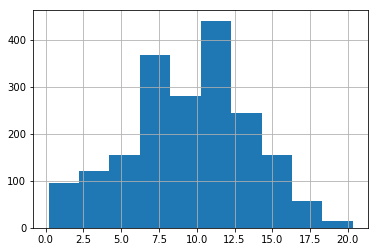

In [90]:
elements[elements.elt_type == '4j'].points.hist()

In [97]:
elements.head()

,base_value,bonus,date,element,elt_type,event,goe,info,number,points,segment,segment_rank,skater,start_order
0,9.5,False,2005-10-23,3F+3T,3j,gpusa05,1.0,,1,10.5,gpusa05 men_short,1,Daisuke TAKAHASHI,0
1,7.5,False,2005-10-23,3A,3j,gpusa05,-3.0,,2,4.5,gpusa05 men_short,1,Daisuke TAKAHASHI,0
2,2.1,False,2005-10-23,CSSp3,sp,gpusa05,0.3,,3,2.4,gpusa05 men_short,1,Daisuke TAKAHASHI,0
3,6.0,False,2005-10-23,3Lz,3j,gpusa05,0.8,,4,6.8,gpusa05 men_short,1,Daisuke TAKAHASHI,0
4,2.3,False,2005-10-23,CiSt2,st,gpusa05,0.5,,5,2.8,gpusa05 men_short,1,Daisuke TAKAHASHI,0


In [98]:
elements.to_csv('pd_data/elements_men.csv')

In [34]:
goes_men.head()

,Unnamed: 0,Base Value,Bonus,Element,Final GOE,GOE,Info,Judge,Segment,Skater
0,0,9.5,False,3F+3T,1.0,1.0,NaN,NaN,gpusa05_men_short,Daisuke TAKAHASHI
1,1,9.5,False,3F+3T,1.0,2.0,NaN,NaN,gpusa05_men_short,Daisuke TAKAHASHI
2,2,9.5,False,3F+3T,1.0,1.0,NaN,NaN,gpusa05_men_short,Daisuke TAKAHASHI
3,3,9.5,False,3F+3T,1.0,1.0,NaN,NaN,gpusa05_men_short,Daisuke TAKAHASHI
4,4,9.5,False,3F+3T,1.0,1.0,NaN,NaN,gpusa05_men_short,Daisuke TAKAHASHI


In [4]:
yuzu_elts = []
for season in seasons.values():
    for event in season.events:
        discipline = event.disciplines[0]
        for segment in discipline.segments:
            for scorecard in segment.scorecards:
                name = scorecard.skater.name
                if name in men_name_fixes:
                    name = men_name_fixes[name]
                if name == 'Yuzuru HANYU':
                    yuzu_elts += scorecard.elements

In [5]:
quads = pd.DataFrame({'quad points': [elt.goe for elt in yuzu_elts if elt.name.startswith('4')]})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119241590>]], dtype=object)

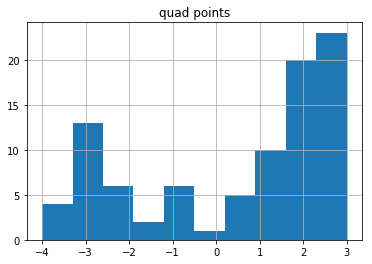

In [6]:
quads.hist()

In [7]:
[elt for elt in yuzu_elts if 'Sp' in elt.name]

[Element(number=3, name='CCoSp4', info='', base_value=3.5, bonus=False, goe=0.1, goes=[-1.0, 1.0, 0.0, 0.0, -1.0, 0.0, 1.0, 1.0, 0.0], parsed_goes=[-1.0, 1.0, 0.0, 0.0, -1.0, 0.0, 1.0, 1.0, 0.0], points=3.6),
 Element(number=6, name='FCSp3', info='', base_value=2.8, bonus=False, goe=-0.04, goes=[0.0, -1.0, 0.0, -1.0, 0.0, 1.0, 0.0, 0.0, 0.0], parsed_goes=[0.0, -1.0, 0.0, -1.0, 0.0, 1.0, 0.0, 0.0, 0.0], points=2.76),
 Element(number=7, name='CSSp4', info='', base_value=3.0, bonus=False, goe=0.57, goes=[0.0, 2.0, 1.0, 0.0, 1.0, 1.0, 2.0, 1.0, 2.0], parsed_goes=[0.0, 2.0, 1.0, 0.0, 1.0, 1.0, 2.0, 1.0, 2.0], points=3.57),
 Element(number=4, name='CSSp4', info='', base_value=3.0, bonus=False, goe=0.5, goes=[0.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0], parsed_goes=[0.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0], points=3.5),
 Element(number=10, name='FCCoSp3', info='', base_value=3.0, bonus=False, goe=0.21, goes=[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0], parsed_goes=[0.0, 0.0, 0.0, 1.0, 1

In [8]:
not_sp = [elt for elt in yuzu_elts if 'Sp' not in elt.name]

In [13]:
choreo = [elt for elt in not_sp if 'ChSq' in elt.name or 'ChSt' in elt.name]

In [18]:
steps = [elt for elt in not_sp if elt not in choreo and 'St' in elt.name]

In [20]:
jumps = [elt for elt in not_sp if elt not in choreo and elt not in steps]

In [10]:
quads.skew()

axel points   -0.653907
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ffd5250>]], dtype=object)

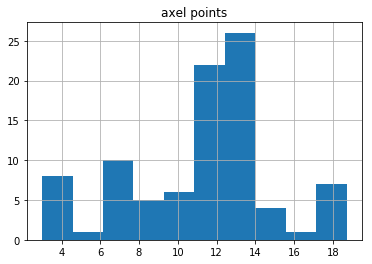

In [11]:
axels = pd.DataFrame({'axel points': [elt.points for elt in yuzu_elts if elt.name.startswith('4')]})
axels.hist()

In [12]:
axels.skew()

axel points   -0.395746
dtype: float64

In [14]:
bychenko_elts = []
for season in seasons.values():
    for event in season.events:
        discipline = event.disciplines[0]
        for segment in discipline.segments:
            for scorecard in segment.scorecards:
                name = scorecard.skater.name
                if name in men_name_fixes:
                    name = men_name_fixes[name]
                if name == 'Alexei BYCHENKO':
                    bychenko_elts += scorecard.elements

In [18]:
bychenko_quads = pd.DataFrame([elt.points for elt in bychenko_elts if elt.name.startswith('4')])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120326f90>]], dtype=object)

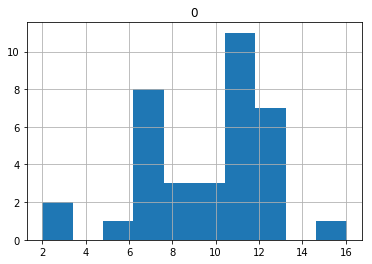

In [19]:
bychenko_quads.hist()

In [20]:
bychenko_quads.skew()

0   -0.483132
dtype: float64

In [21]:
len(bychenko_quads)

36

In [22]:
len(quads)

90

In [99]:
men = pd.read_csv('pd_data/results_nowd_nofra15_men.csv')

In [101]:
pairs18 = pd.read_csv('pair18.csv')

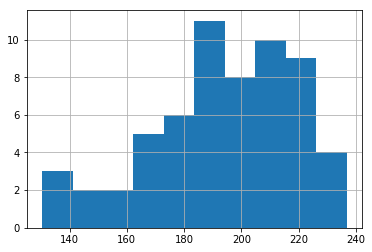

In [103]:
pairs18.Points.hist()

In [114]:
np.min(elements[elements.elt_type == 'ch'].points)

0.0